<a href="https://colab.research.google.com/github/silambarasan-2/feedback-analysis-intern/blob/main/feedback_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!git clone https://github.com/silambarasan-2/feedbackanalysis.git

Cloning into 'feedbackanalysis'...
fatal: could not read Username for 'https://github.com': No such device or address


In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
!pip install transformers
import random
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Initialize Faker and NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
lemmatizer = WordNetLemmatizer()
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

# Predefined feedback templates
# Expanded feedback templates
feedback_templates = [
    "The {product} is {adjective}.",
    "I feel the {product} {verb} {adverb}.",
    "{pronoun} {verb} the {product}.",
    "The {product} could {verb} {adverb}.",
    "Using the {product} is {adjective}.",
    "The experience with the {product} was {adjective}.",
    "Sometimes, the {product} is {adjective}.",
    "My interaction with the {product} was {adjective}.",
    "The design of the {product} is {adjective}.",
    "It would be better if the {product} {verb} {adverb}.",
    "The {product} should {verb} better.",
    "The overall functionality of the {product} is {adjective}.",
    "The {product} often {verb} {adverb}.",
    "I think the {product} is {adjective}.",
    "The way the {product} {verb} is {adjective}.",
    "The {product} needs to {verb} more {adverb}.",
    "Sometimes, the {product} doesn't {verb} {adverb}.",
    "If the {product} {verb} more {adverb}, it would be {adjective}.",
    "The overall experience with the {product} is {adjective}.",
    "The {product} looks {adjective}, which makes it {adjective2}.",
    "My {product} usage feels {adjective}.",
    "Improving the {product} would make it {adjective}.",
    "The {product} combines a {adjective} design with {adjective2} functionality.",
    "I find the {product} to be equally {adjective} and {adjective2}.",
    "While the {product} excels in design, its performance is {adjective2}.",
    "The {product} needs to be more {adjective} in order to {verb} effectively."
]


# Expanded word lists
adjectives = [
    "great", "bad", "fast", "slow", "reliable", "user-friendly", "complex", "unstable",
    "modern", "efficient", "intuitive", "outdated", "robust", "innovative", "poor",
    "responsive", "dull", "interactive", "streamlined", "laggy", "versatile"
]
adverbs = [
    "well", "poorly", "smoothly", "efficiently", "inconsistently", "flawlessly",
    "quickly", "slowly", "seamlessly", "awkwardly", "perfectly", "strangely"
]
verbs = [
    "work", "perform", "respond", "operate", "handle", "process", "function",
    "interact", "move", "react", "engage", "adapt", "improve", "decline"
]
products = [
    "elevator", "button", "display", "door", "control panel", "sensor", "lighting",
    "dashboard", "interface", "security system"
]
pronouns = ["It", "This", "That", "We", "They", "The system"]
adjectives2 = ["intuitive", "unstable", "outdated", "modern", "robust", "innovative", "poor"]


In [5]:
# Generate random feedbacks
def generate_feedback(n=50):
    data = []
    for _ in range(n):
        template = random.choice(feedback_templates)
        feedback = template.format(
            product=random.choice(products),
            adjective=random.choice(adjectives),
            adjective2=random.choice(adjectives2),
            verb=random.choice(verbs),
            adverb=random.choice(adverbs),
            pronoun=random.choice(pronouns)
        )
        data.append({
            "Feedback": feedback,
            "Category": random.choice(["Usability", "Performance", "Design"])
        })
    return pd.DataFrame(data)



In [6]:
#save the file
def save_feedback_to_txt(file_name='feedback.txt',n=50):
  feedback_df=generate_feedback(n)
  with open(file_name,'w') as f:
    for index,row in feedback_df.iterrows():
      f.write(f"{row['Feedback']} | Category: {row['Category']}\n")

In [7]:
from google.colab import files
uploaded = files.upload()


Saving feedback (1).txt to feedback (1).txt


In [8]:
!ls /content/
file_name = '/content/feedback (1).txt'

 drive	'feedback (1).txt'   sample_data


In [9]:
def read_feedback_from_txt(file_name):
    feedback_data = []
    with open(file_name, 'r') as file:
        for line in file:
            # Split by ' | ' to separate feedback and category
            parts = line.strip().split(' | ')
            if len(parts) == 2:
                feedback = parts[0].strip()
                category = parts[1].split(':')[-1].strip()  # Extract category part
                feedback_data.append({'Feedback': feedback, 'Category': category})
    return feedback_data


In [10]:
feedback_data = read_feedback_from_txt(file_name)


In [11]:
from transformers import pipeline
from transformers import BartForConditionalGeneration, BartTokenizer

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.83      0.83      0.83         6
    Positive       0.50      0.67      0.57         3

    accuracy                           0.70        10
   macro avg       0.44      0.50      0.47        10
weighted avg       0.65      0.70      0.67        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


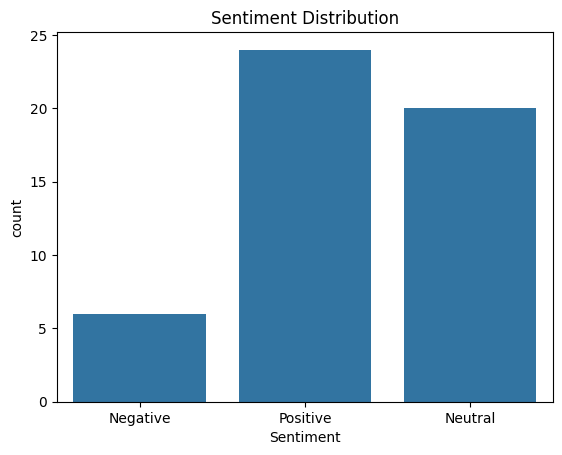

What People Like:
1    Improving the dashboard would make it interact...
3      Sometimes, the dashboard doesn't engage slowly.
5    The control panel needs to be more reliable in...
6                      My lighting usage feels robust.
8            The control panel should interact better.
Name: Feedback, dtype: object

What People Dislike:
4                      Sometimes, the interface is bad.
17                  The lighting could adapt awkwardly.
34          The lighting needs to react more awkwardly.
35              The experience with the button was bad.
49    If the lighting adapt more awkwardly, it would...
Name: Feedback, dtype: object

What Should Be Improved:
8             The control panel should interact better.
9                   The elevator should process better.
15    It would be better if the dashboard interact w...
18    It would be better if the interface improve po...
29    It would be better if the door improve seamles...
Name: Feedback, dtype: object


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Merged and Summarized Feedback:
The experience with the button was bad. The control panel should interact better. The lighting could adapt awkwardly. Sometimes, the interface is bad.


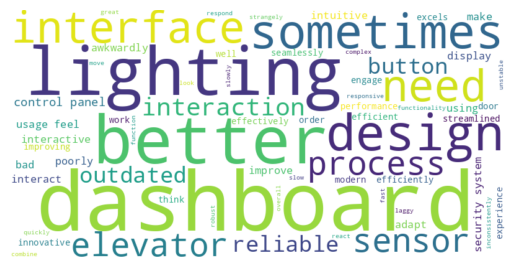

In [12]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

def assign_sentiment(feedback):
    sentiment_score = sia.polarity_scores(feedback)
    if sentiment_score['compound'] > 0.05:
        return 'Positive'
    elif sentiment_score['compound'] < -0.05:
        return 'Negative'
    return 'Neutral'

def extract_improvement(feedback):
    improvement_keywords = ['improve', 'better', 'enhance', 'fix', 'update', 'optimize', 'refine']
    return 'Improvement' if any(keyword in feedback.lower() for keyword in improvement_keywords) else 'No Improvement'


# Generate and preprocess feedback
feedback_data_list = read_feedback_from_txt(file_name)
df_feedback = pd.DataFrame(feedback_data_list)
df_feedback = df_feedback.drop_duplicates(subset=['Feedback'])
df_feedback['Cleaned_Feedback'] = df_feedback['Feedback'].apply(preprocess_text)
df_feedback['Sentiment'] = df_feedback['Cleaned_Feedback'].apply(assign_sentiment)
df_feedback['Improvement'] = df_feedback['Cleaned_Feedback'].apply(extract_improvement)

# Filter labeled data
labeled_data = df_feedback.dropna(subset=['Cleaned_Feedback', 'Sentiment'])

# Train a model
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(labeled_data['Cleaned_Feedback'])
y = labeled_data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print model results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualization
sns.countplot(x='Sentiment', data=df_feedback)
plt.title('Sentiment Distribution')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_feedback['Cleaned_Feedback']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud of Feedback')
#plt.show()

# Display top feedback insights
print("What People Like:")
print(df_feedback[df_feedback['Sentiment'] == 'Positive']['Feedback'].head())

print("\nWhat People Dislike:")
print(df_feedback[df_feedback['Sentiment'] == 'Negative']['Feedback'].tail())

print("\nWhat Should Be Improved:")
print(df_feedback[df_feedback['Improvement'] == 'Improvement']['Feedback'].head())


# Initialize BART model and tokenizer
model_name = 'facebook/bart-large-cnn'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

# Function to merge and summarize feedback
def extract_improvement_with_bart(df, negative_ratio=0.6, improvement_ratio=0.4):
    # Combine 60% Negative and 40% Improvement feedback
    negative_feedback = df[df['Sentiment'] == 'Negative'].sample(frac=negative_ratio)['Feedback']
    improvement_feedback = df[df['Improvement'] == 'Improvement'].sample(frac=improvement_ratio)['Feedback']

    combined_feedback = ' '.join(negative_feedback.tolist() + improvement_feedback.tolist())

    # Summarize feedback using BART
    inputs = tokenizer.encode(combined_feedback, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=50, min_length=20, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Example usage
summary = extract_improvement_with_bart(df_feedback)
print("Merged and Summarized Feedback:")
print(summary)